# Physics 240 
## Intermediate Physics Laboratory
## FINAL EXAM

### Instructions: 
Answer the following questions and typeset your answers within this notebook, 
using a mix of markdown and LaTeX code. Some of your work will likely be done
by hand; for this work, make sure to turn in these calculations, but still put the 
answers in this Jupyter Notebook. 

Follow the steps below and answer the questions as indicated.

In [9]:
## This cell installs custom CSS Cell Styles obtained from 
## Prof. Lorena Barba at https://github.com/barbagroup/AeroPython 
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()



## Step 1: Create a GitHub Repository and make an initial commit.
    a. Create a folder in your Documents folder called LastnameFirstname240FinalExam.
    b. Create a new repository within this folder called 240FinalExam
    c. Save this file into the above folder as LastnameFirstnameAnswers.ipynb 
    d. You should then see an uncommitted change to the 240FinalExam repository; name this "initial commit"
    and publish the changes.
    
For example, if your name was Albert Einstein, you'd create a folder called   
    *EinsteinAlbert240FinalExam*,   
then you would create a new GitHub repository (within this folder) called   
    *240FinalExam*   
and would save this file into the folder 240FinalExam as    
    *EinsteinAlbertFinalAnswers.ipynb*   
and upload the file to your github account. 

Hint: Once you complete steps (a) and (b), you can simply close and halt this notebook (from the Jupyter Notebook file menu, and use your file system browser to drag this file into the folder 240FinalExam. Then this file's existence should show up as as an uncommitted change which you can publish (after first labelling it as the initial commit, of course). 

All of the above may be easily done by using a GitHub Gui Client available for OSX, Linux, and Windoze at:
https://github.com/gitterHQ/desktop

For the following questions, I encourage you to make and publish a new commit after you finish each question.


# Question 1
## Statistical Uncertainty with dropped velociraptors

<img src="Velociraptor.jpg" width=150 height=150>

A velociraptor is dropped from a height of 10.0 $\pm$ 0.1 meters and the fall time   
is measured to the nearest 0.01 seconds. This *experiment* is performed a dozen times with the following drop times in seconds obtained:   
1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35   
Calculate the mean value of the drop time and the root mean square uncertainty, $\Delta t_{rms}$. You may use python or---if you like suffering---your calculator. 

### Solution method :

The array is given, the mean of the array is simply the sum divided by its length.
The RMS value is defined as 
$$\sqrt{\frac{1}{i}\sum_{i=1}^{i}(x_i-\bar x)^2}$$


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = [1.22, 1.39, 1.55, 1.43, 1.11, 1.64, 1.44, 1.33, 1.55, 1.49, 1.47, 1.35]
t_bar = np.sum(t)/len(t)
print(t_bar)
t_i = (t - t_bar)**2
t_rms = np.sqrt(np.sum(t_i)/len(t))
print(t_rms)

1.41416666667
0.141330483462
[ 0.03770069  0.00058403  0.01845069  0.00025069  0.09251736  0.05100069
  0.00066736  0.00708403  0.01845069  0.00575069  0.00311736  0.00411736]


### Question 1 Answer

Mean time = 1.41 s   

$\Delta t_{rms}$ = 0.14 s

# Question 2
## Error Propagation; measuring g via dropped velociraptors

Suppose you assume that the velociraptor drop experiment was used to determine the acceleration due to gravity. Using your knowledge of basic kinematics (and assuming
no air resistance), calculate the experimental value of $g$ that you should report for this data.

### Solution Method:

From Newton's Second Law, we have $$ g = \frac{2x}{t^2}$$
The uncertainty of g is from both the height and the time. The uncertainty of height is $\pm 0.1m$, and the uncertainty of time we can use the rms value which is 0.14s from previous calculation.
The error propagation results can be given by $$ \Delta g = \sqrt{(\frac{\partial g}{\partial t} \Delta t)^2 + (\frac{\partial g}{\partial x} \Delta x)^2}$$

In [24]:
import numpy as np
g = 20/(1.41)**2
print(g)
g_i = np.sqrt(((-20/1.41) * 0.14)**2 + ((2/(1.41**2)) * 0.1)**2)
print(g_i)

10.059856144057141
1.98836205934


### Question 2 Answer

g = 10$\pm$1.98 m/s^2 

# Question 3
## Determining g with a point mass pendulum via plotting

Suppose that you measure the period of a simple pendulum as a function of length   
and obtain the following data:   

Period Values ($\pm 0.1$ s) =  0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50.   
Length $(\pm 0.03)$ m =  0.010,  0.025, 0.070,  0.10,  0.140, 0.230, 0.310, 0.350, 0.500   

Knowing that the period of a simple pendulum is   
$\displaystyle T = 2π\sqrt{\frac{L}{g}}$   
and use an appropriate graph, such that the plot:   

    a. gives a straight line whose slope   
       directly gives the value of g   
    b. shows data points with error bars   
    c. includes axes labels and units   
    d. includes a best fit line to the data.   

Note that you might not be on the earth when conducting this experiment.


### Solution method:

Rearranging the equation above, we have $$ g = \frac{4\pi ^2 L}{T^2} $$
so plotting $4\pi ^2L$ vs $T^2$ would result in a line with slope = $g$

0.949665398107
[[ 0.00044523]]


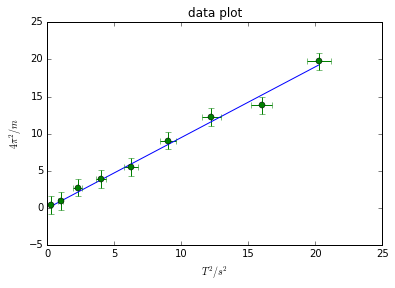

In [76]:
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.optimize import curve_fit

T = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50]
L = [0.010, 0.025, 0.070, 0.10, 0.140, 0.230, 0.310, 0.350, 0.500]
L_err = 4*np.pi**2*0.03
T_err = np.array([])
T_x = np.array([])
L_y = np.array([])
for i in range(0,9):
    T_err = np.append(T_err, 0.2*T[i])
    T_x = np.append(T_x, T[i]**2)
    L_y = np.append(L_y, 4*np.pi**2*L[i])

def linearFit(t, m): 
    return m*t
fit_params1, fit_cov1 = curve_fit(linearFit, T_x, L_y)

plt.plot(T_x, linearFit(T_x, fit_params1[0]))
print(fit_params1[0])
plt.errorbar(T_x, L_y, xerr=T_err, yerr=L_err, fmt='o')
plt.xlabel('$T^2 / s^2$')
plt.ylabel('$4\pi ^2 / m $')
plt.title("data plot")
print(fit_cov1)

### Question 3 Answer

g $\pm\;\Delta$ g = 0.95 $\pm$0.00044$m/s^2$

# Final Step for online portion
## Final steps, then move on to written portion

Now make sure to commit your changes to your master copy, but before doing so, place a link to your repository in the next cell.   

Repository Link = 